# Kepler star light curves and power spectra

Figure 11.9 from Chapter 11 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University Press.

Plots of the light curves and derived power spectrum density for two red giant stars observed with Kepler.
 * KIC 2425375 (M=1.5 Msun , R=11 Rsun)
 * KIC 5858947 (M=1.05 Msun , R=4.5 Rsun)

Data files are stored in the `KeplerStars/` folder in the same directory as this notebook.  Data provided by
Dr. Mathieu Vrard.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig11_9.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Light curves and power spectrum density

We plot data for two stars: KIC2425375 and KIC5858947 found in the `KeplerStars/` folder.  Files are named
`<starName>_LC.txt` for light curves, and `<starName>_psd.txt` for power spectra.

Light curve (LC) files are 2-column ascii format:
 * Col1: Modified Julian Day (MJD) in decimal days, change to range 0..10 days
 * Col2: Flux-Mean in flux units of ppm, scaled to ppt (parts per thousand)
 
The power spectrum density are 2-column ascii format:
 * Col1: frequency in micro-Hz
 * Col2: power density in units of ppm<sup>2</sup>/$\mu$Hz, scaled to ppt<sup>2</sup>/$\mu$Hz


In [3]:
dataDir = 'KeplerStars'

starList = ['2425375','5858947'] # KIC number

# initialize empty dictionaries with the data arrays to plot

t = {}
f = {}
freq = {}
psd = {}

# Load the arrays 

for star in starList:
    lcFile = f'{dataDir}/KIC{star}_LC.txt'
    data = pd.read_csv(lcFile,sep=r'\s+',header=None,comment='#')
    t[star] = np.array(data[0])
    t[star] -= t[star][0] # change time range to 0..10 days
    f[star] = np.array(data[1])/1000.0 # scale to ppt

    psdFile = f'{dataDir}/KIC{star}_PSD.txt'
    data = pd.read_csv(psdFile,sep=r'\s+',header=None,comment='#')
    freq[star] = np.array(data[0])
    psd[star] = np.array(data[1])/1.0e6 # scale to ppt^2/uHz
    
# light curve limits

tMin = [0,0]
tMax = [10,10]

fMin = [-2,-2]
fMax = [2,2]

# power spectrum limits

nuMin = [20,20]
nuMax = [200,200]

psdMin = [0,0]
psdMax = [0.1,0.02]
yMajor = [0.02,0.005]
yMinor = [0.005,0.001]

# power spectrum label bits

dnu = [4.42,14.47]
maxnu = [41.9,169.2]

## Figure 11.9

4-panel plot, 2x2

Top:
 * panel 1: Star 1 light curve
 * panel 2: Star 1 power spectrum

Bottom:
 * panel 1: Star 2 light curve
 * panel 2: Star 2 power spectrum

All axes are linear

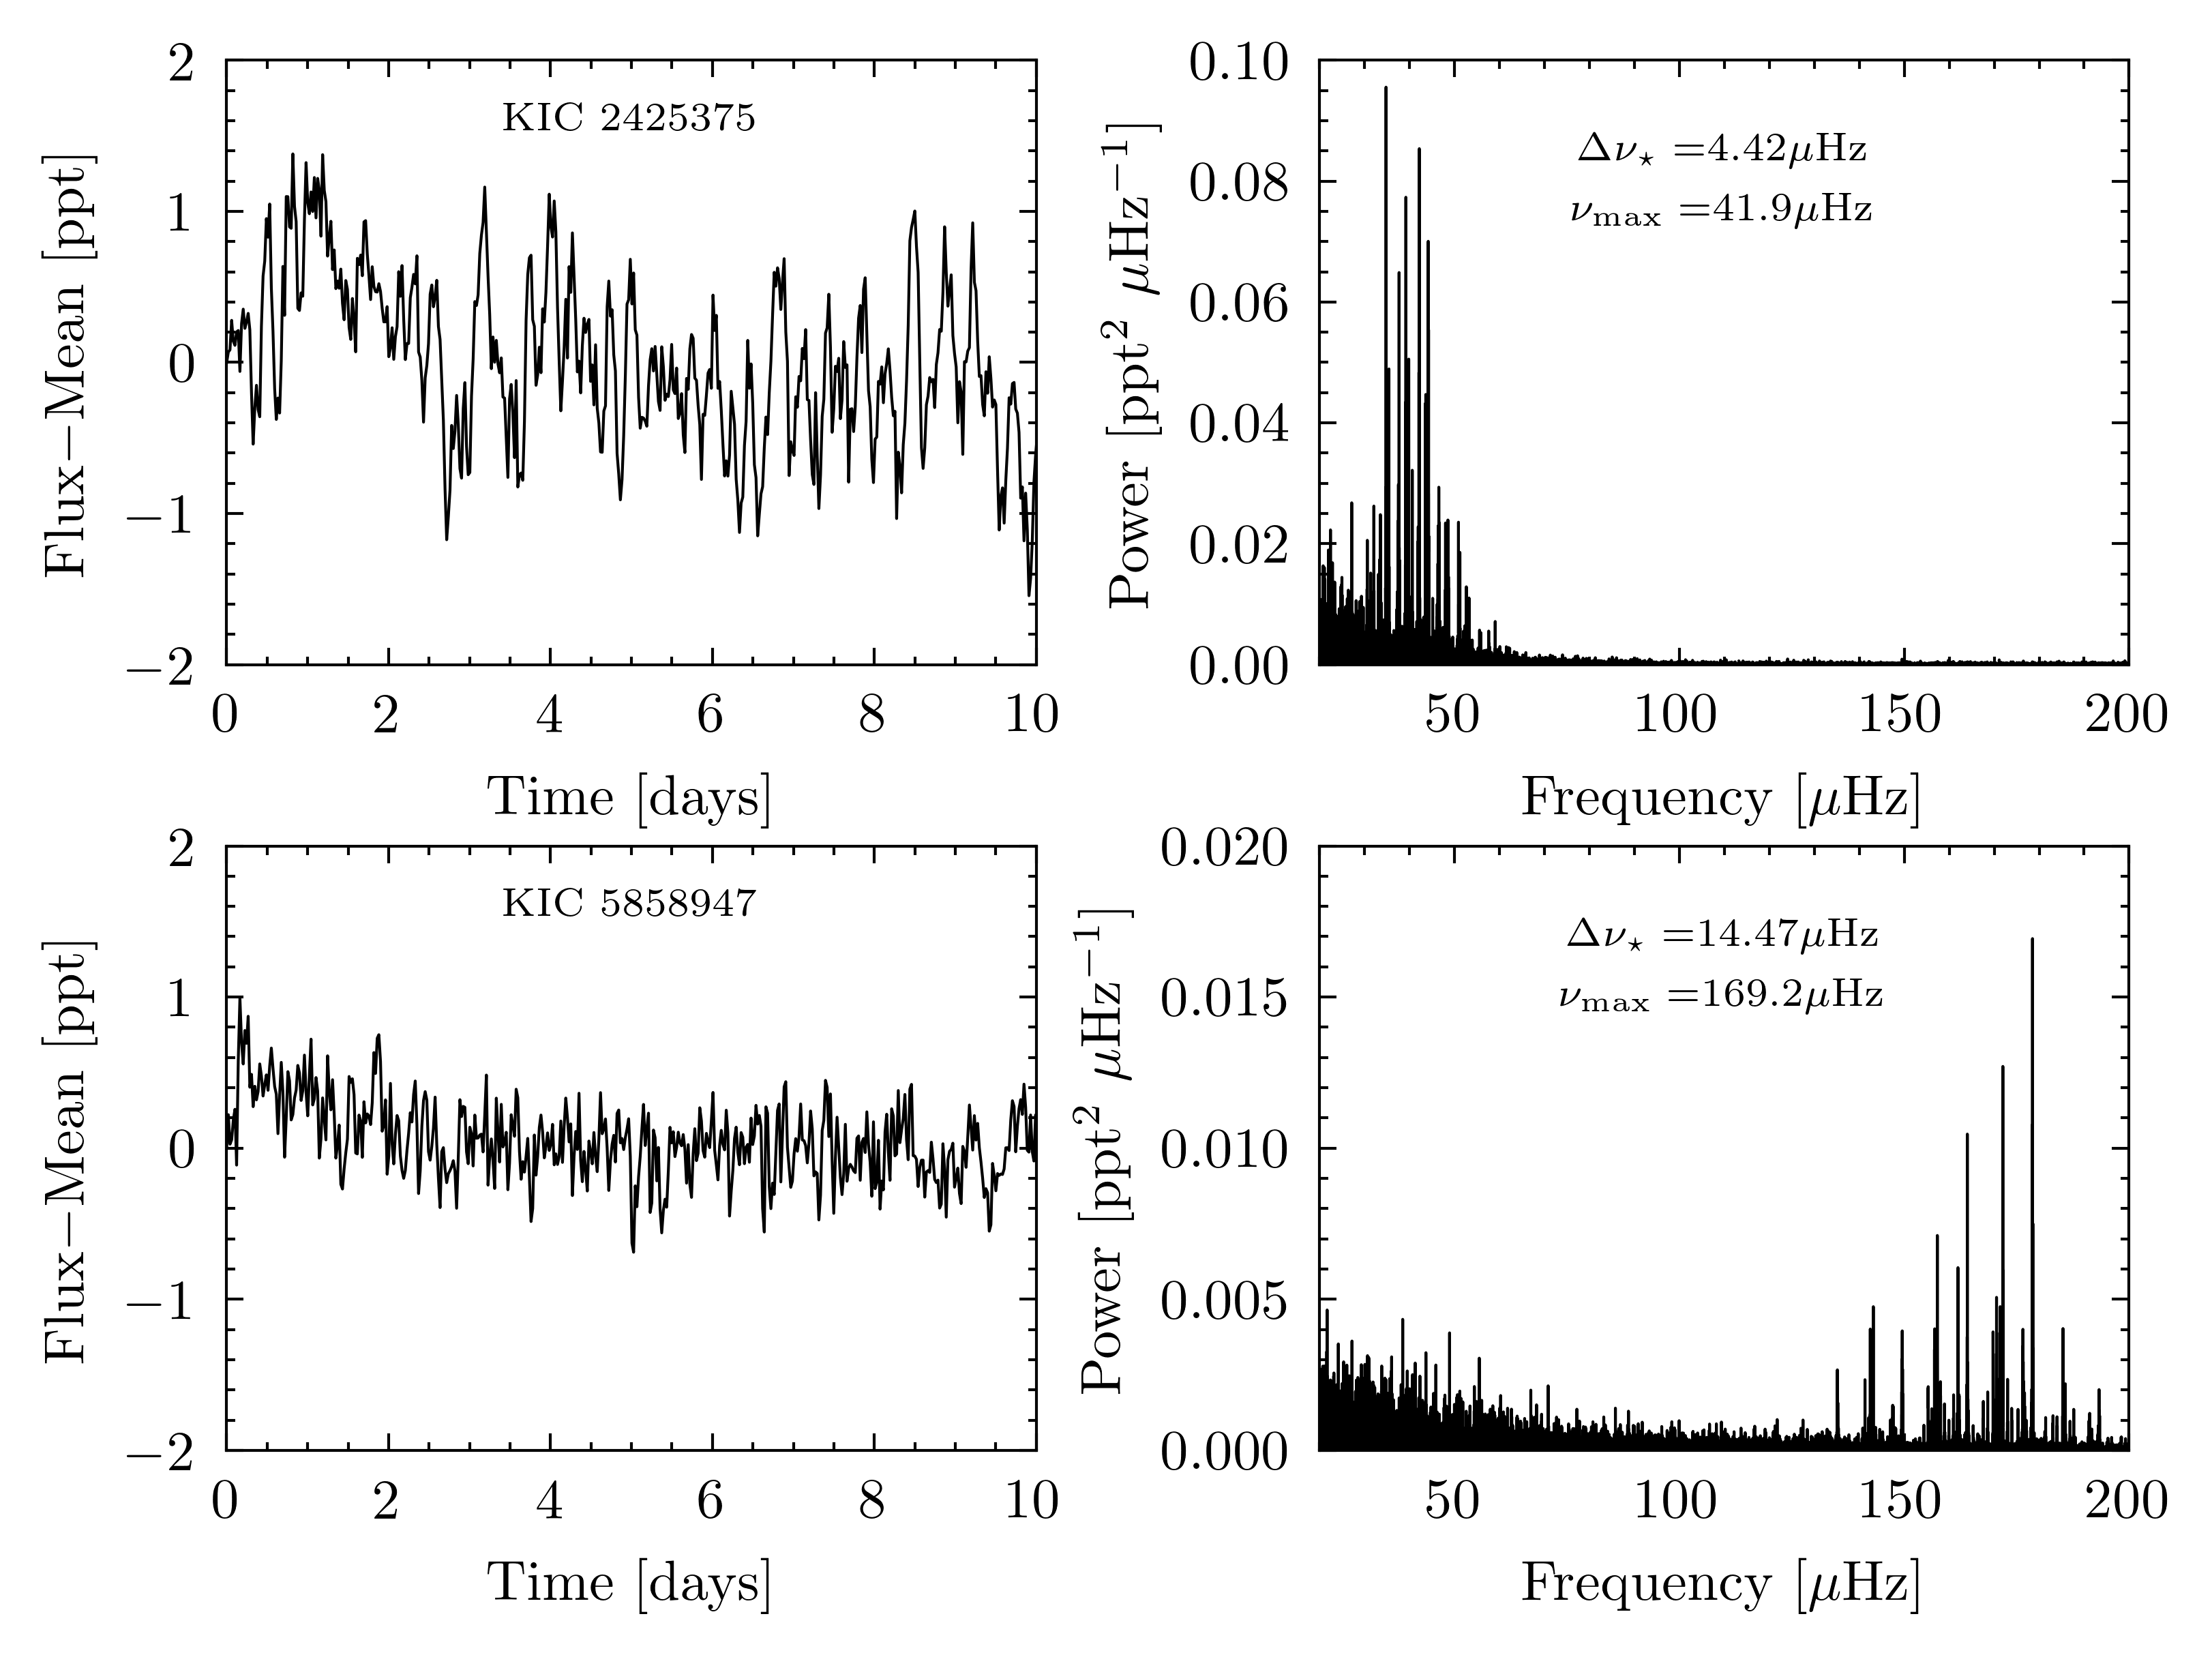

In [4]:
fig,ax = plt.subplots(2,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.35, hspace=0.3)

for i, star in enumerate(starList):
    
    # Panel 1

    ax[i,0].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i,0].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

    ax[i,0].set_xlim(tMin[i],tMax[i])
    ax[i,0].set_xlabel(r'Time [days]',fontsize=axisFontSize)
    ax[i,0].xaxis.set_major_locator(MultipleLocator(2.0))
    ax[i,0].xaxis.set_minor_locator(MultipleLocator(0.5))

    ax[i,0].set_ylim(fMin[i],fMax[i])
    ax[i,0].set_ylabel(r'Flux$-$Mean [ppt]',fontsize=axisFontSize)
    ax[i,0].yaxis.set_major_locator(MultipleLocator(1.0))
    ax[i,0].yaxis.set_minor_locator(MultipleLocator(0.2))

    tMid = 0.5*(tMin[i]+tMax[i])
    fRange = fMax[i] - fMin[i]
    ax[i,0].plot(t[star],f[star],'-',lw=0.5,color='black',zorder=10)
    ax[i,0].text(tMid,fMin[i]+0.9*fRange,f'KIC {star}',va='center',ha='center',fontsize=labelFontSize)
    
    # Panel 2

    ax[i,1].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i,1].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

    ax[i,1].set_xlim(nuMin[i],nuMax[i])
    ax[i,1].set_xlabel(r'Frequency [$\mu$Hz]',fontsize=axisFontSize)
    ax[i,1].xaxis.set_major_locator(MultipleLocator(50))
    ax[i,1].xaxis.set_minor_locator(MultipleLocator(10))

    ax[i,1].set_ylim(psdMin[i],psdMax[i])
    ax[i,1].set_ylabel(r'Power [ppt$^2$ $\mu$Hz$^{-1}$]',fontsize=axisFontSize)
    ax[i,1].yaxis.set_major_locator(MultipleLocator(yMajor[i]))
    ax[i,1].yaxis.set_minor_locator(MultipleLocator(yMinor[i]))

    ax[i,1].plot(freq[star],psd[star],'-',lw=0.5,color='black',zorder=10)

    nuMid = 0.5*(nuMin[i]+nuMax[i])
    psdRange = psdMax[i] - psdMin[i]
    labStr = r'$\Delta\nu_{\star}=$' + f'{dnu[i]:.2f}' + r'$\mu$Hz'
    ax[i,1].text(nuMid,psdMin[i]+0.85*psdRange,labStr,va='center',ha='center',fontsize=labelFontSize)
    labStr = r'$\nu_{\rm max}=$' + f'{maxnu[i]:.1f}' + r'$\mu$Hz'
    ax[i,1].text(nuMid,psdMin[i]+0.75*psdRange,labStr,va='center',ha='center',fontsize=labelFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')